In [1]:
import pynucastro as pyna

In [2]:
reaclib_lib = pyna.ReacLibLibrary()

In [18]:
original_nuclei = ["p",
                   "he4", "c12", "o16", "ne20", "mg24", "si28", "s32",
                   "ar36", "ca40", "ti44", "cr48", "fe52", "ni56",
                   "al27", "p31", "cl35", "k39", "sc43", "v47", "mn51", "co55",
                   "n13", "n14", "f18", "ne21", "na22"]

In [19]:
subch_orig = reaclib_lib.linking_nuclei(original_nuclei)

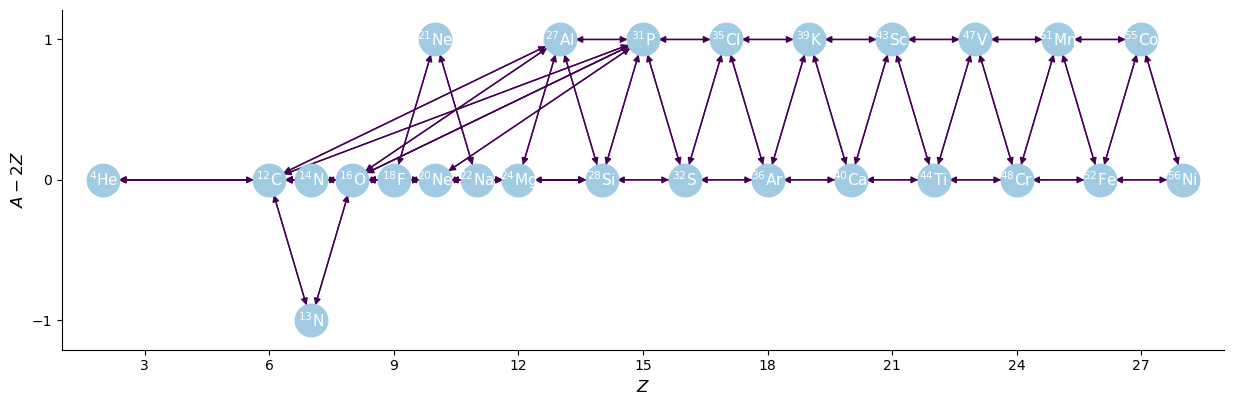

In [20]:
rc_orig = pyna.RateCollection(libraries=[subch_orig])
rc_orig.plot(rotated=True, hide_xalpha=True, size=(1500, 450), node_size=500, node_font_size=11)

In [21]:
print(subch_orig)

he4 + he4 + he4 --> c12        [Q =   7.28 MeV] (he4 + he4 + he4 --> c12 <fy05_reaclib__>)
c12 + p --> n13                [Q =   1.94 MeV] (c12 + p --> n13 <ls09_reaclib__>)
c12 + he4 --> o16              [Q =   7.16 MeV] (c12 + he4 --> o16 <nac2_reaclib__>)
c12 + c12 --> he4 + ne20       [Q =   4.62 MeV] (c12 + c12 --> he4 + ne20 <cf88_reaclib__>)
n13 + he4 --> p + o16          [Q =   5.22 MeV] (n13 + he4 --> p + o16 <cf88_reaclib__>)
n14 + he4 --> f18              [Q =   4.41 MeV] (n14 + he4 --> f18 <il10_reaclib__>)
o16 + he4 --> ne20             [Q =   4.73 MeV] (o16 + he4 --> ne20 <co10_reaclib__>)
o16 + c12 --> he4 + mg24       [Q =   6.77 MeV] (o16 + c12 --> he4 + mg24 <cf88_reaclib__>)
o16 + c12 --> p + al27         [Q =   5.17 MeV] (o16 + c12 --> p + al27 <cf88_reaclib__>)
o16 + o16 --> he4 + si28       [Q =   9.59 MeV] (o16 + o16 --> he4 + si28 <cf88_reaclib__>)
o16 + o16 --> p + p31          [Q =   7.68 MeV] (o16 + o16 --> p + p31 <cf88_reaclib__>)
f18 + he4 --> p + ne21    

## remove reverse rates with light nuclei

In [22]:
rfilter = pyna.rates.RateFilter(filter_function=lambda r: r.Q > 0 or r.Q < 0 and sorted(r.products)[-1].A >= 28)

In [23]:
subch_orig = subch_orig.filter(rfilter)

In [24]:
subch_orig

he4 + he4 + he4 --> c12        [Q =   7.28 MeV] (he4 + he4 + he4 --> c12 <fy05_reaclib__>)
c12 + p --> n13                [Q =   1.94 MeV] (c12 + p --> n13 <ls09_reaclib__>)
c12 + he4 --> o16              [Q =   7.16 MeV] (c12 + he4 --> o16 <nac2_reaclib__>)
c12 + c12 --> he4 + ne20       [Q =   4.62 MeV] (c12 + c12 --> he4 + ne20 <cf88_reaclib__>)
n13 + he4 --> p + o16          [Q =   5.22 MeV] (n13 + he4 --> p + o16 <cf88_reaclib__>)
n14 + he4 --> f18              [Q =   4.41 MeV] (n14 + he4 --> f18 <il10_reaclib__>)
o16 + he4 --> ne20             [Q =   4.73 MeV] (o16 + he4 --> ne20 <co10_reaclib__>)
o16 + c12 --> he4 + mg24       [Q =   6.77 MeV] (o16 + c12 --> he4 + mg24 <cf88_reaclib__>)
o16 + c12 --> p + al27         [Q =   5.17 MeV] (o16 + c12 --> p + al27 <cf88_reaclib__>)
o16 + o16 --> he4 + si28       [Q =   9.59 MeV] (o16 + o16 --> he4 + si28 <cf88_reaclib__>)
o16 + o16 --> p + p31          [Q =   7.68 MeV] (o16 + o16 --> p + p31 <cf88_reaclib__>)
f18 + he4 --> p + ne21    

## add in some missing C+C, C+O, and O+O rates

In [25]:
other_rates = [(("c12", "c12"), ("mg23", "n")),
               (("mg23", "n"), ("mg24")),
               (("o16", "o16"), ("s31", "n")),
               (("s31", "n"), ("s32")),
               (("c12", "o16"), ("si27", "n")),
               (("si27", "n"), ("si28"))]

In [26]:
for r, p in other_rates:
    if not isinstance(p, tuple):
        p = p,
    rfilter = pyna.rates.RateFilter(reactants=r, products=p)
    _library = reaclib_lib.filter(rfilter)
    print(_library)
    subch_orig += _library

c12 + c12 --> n + mg23         [Q =  -2.60 MeV] (c12 + c12 --> n + mg23 <cf88_reaclib__reverse>)
mg23 + n --> mg24              [Q =  16.53 MeV] (mg23 + n --> mg24 <ths8_reaclib__>)
o16 + o16 --> n + s31          [Q =   1.50 MeV] (o16 + o16 --> n + s31 <cf88_reaclib__>)
s31 + n --> s32                [Q =  15.04 MeV] (s31 + n --> s32 <ths8_reaclib__>)
o16 + c12 --> n + si27         [Q =  -0.42 MeV] (o16 + c12 --> n + si27 <cf88_reaclib__reverse>)
si27 + n --> si28              [Q =  17.18 MeV] (si27 + n --> si28 <ths8_reaclib__>)


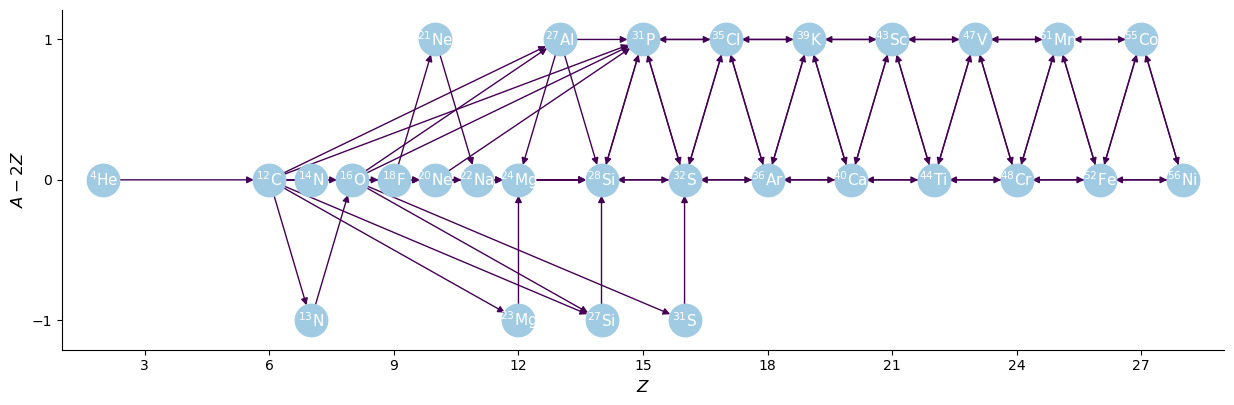

In [27]:
rc_orig = pyna.RateCollection(libraries=[subch_orig])
rc_orig.plot(rotated=True, hide_xalpha=True, size=(1500, 450), node_size=500, node_font_size=11)

In [29]:
print(len(rc_orig.unique_nuclei), len(rc_orig.rates))

31 81


## iron-group equilibrium

In [30]:
iron_peak = ["n", "p", "he4", "fe52", "fe53", "fe54", "co55", "ni56"]
iron_lib = reaclib_lib.linking_nuclei(iron_peak)

In [31]:
iron_lib

n --> p                        [Q =   0.78 MeV] (n --> p <wc12_reaclib_weak_>)
fe52 + n --> fe53              [Q =  10.69 MeV] (fe52 + n --> fe53 <ths8_reaclib__>)
fe52 + he4 --> p + co55        [Q =   0.83 MeV] (fe52 + he4 --> p + co55 <ths8_reaclib__>)
fe52 + he4 --> ni56            [Q =   8.00 MeV] (fe52 + he4 --> ni56 <ths8_reaclib__>)
fe53 + n --> fe54              [Q =  13.38 MeV] (fe53 + n --> fe54 <ths8_reaclib__>)
fe54 + p --> co55              [Q =   5.06 MeV] (fe54 + p --> co55 <ths8_reaclib__>)
co55 + p --> ni56              [Q =   7.17 MeV] (co55 + p --> ni56 <ths8_reaclib__>)
ni56 + n --> he4 + fe53        [Q =   2.69 MeV] (ni56 + n --> he4 + fe53 <ths8_reaclib__>)
fe53 + he4 --> n + ni56        [Q =  -2.69 MeV] (fe53 + he4 --> n + ni56 <ths8_reaclib__reverse>)
fe53 --> n + fe52              [Q = -10.69 MeV] (fe53 --> n + fe52 <ths8_reaclib__reverse>)
fe54 --> n + fe53              [Q = -13.38 MeV] (fe54 --> n + fe53 <ths8_reaclib__reverse>)
co55 + p --> he4 + fe52       

In [32]:
subch_orig += iron_lib

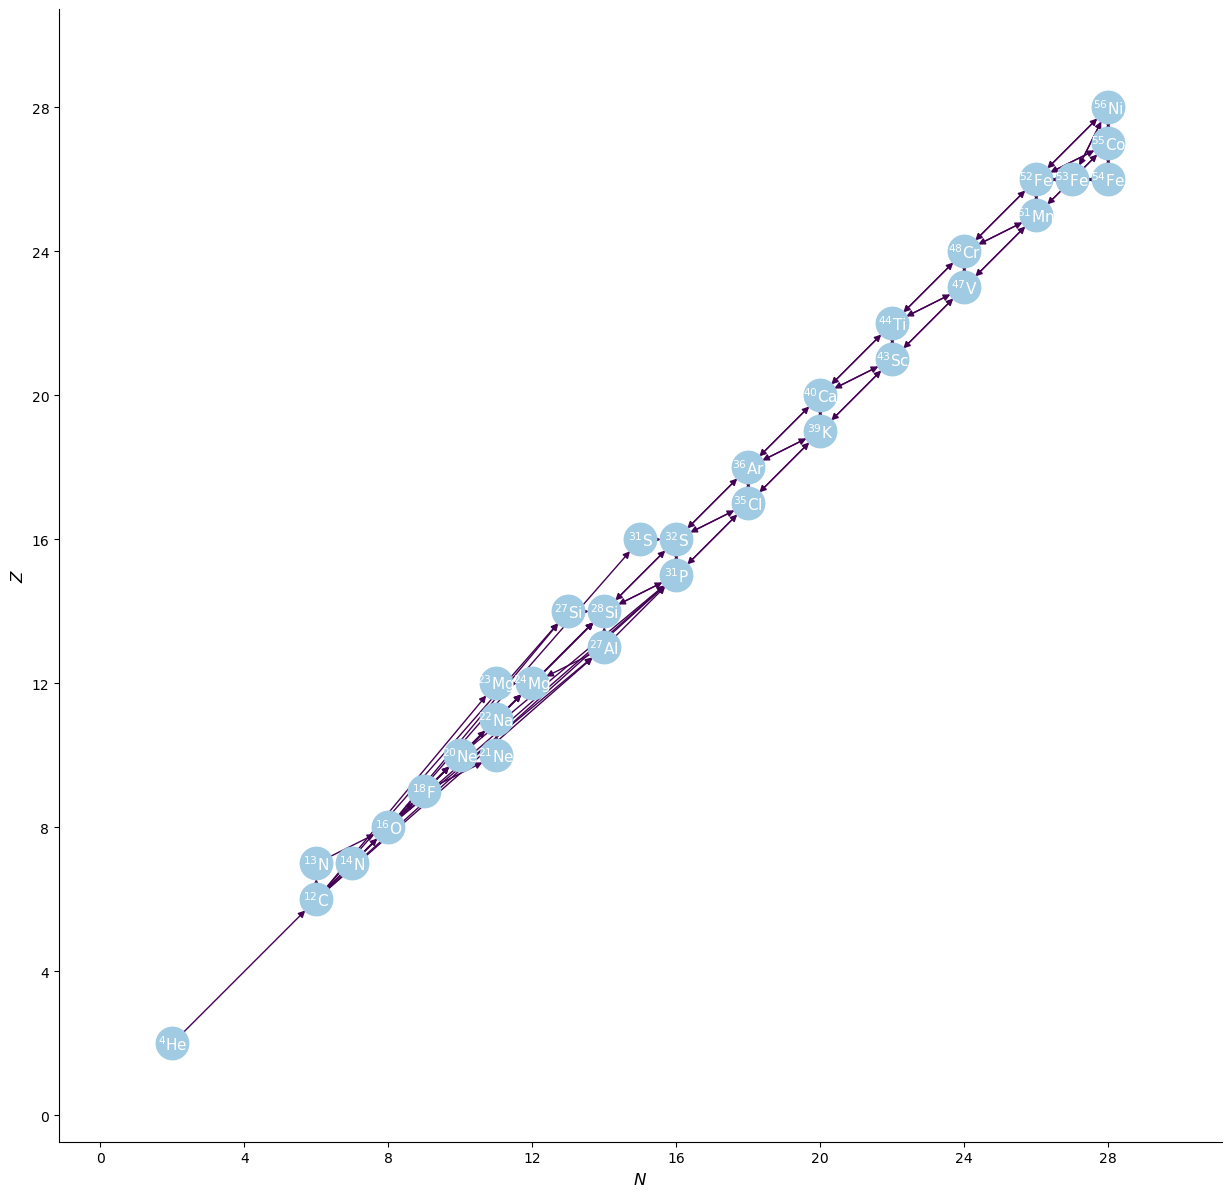

In [33]:
rc_orig = pyna.RateCollection(libraries=[subch_orig])
rc_orig.plot(hide_xalpha=True, size=(1500, 1500), node_size=500, node_font_size=11)